# LTAT.02.006 Andmeteaduse meetodid, sügis 2025

# 3. kodutöö

## Tähtaeg: esmaspäev, 20. oktoober, kell 12:00 (keskpäeval)


### Kodutöö reeglid

Palun kontrollige üle kodutööde reeglid esimesest kodutööst, samad reeglid kehtivad siin.

### Palun lugege kokku kodutööle kulunud aeg

Palun, et loeksite kokku kodutööle kulunud aeg, eriti hea kui ka eraldi iga ülesande peale kulunud aeg. Eraldi ülesannete alapunktide kaupa pole aega vaja eristada. Kulunud aeg kirjutage palun selleks mõeldud lahtritesse kodutöö lõpus. See ei ole kohustuslik ega mõjuta hinnet, kuid aitab kodutöid paremaks teha.


# 1. ülesanne. Kliimamudelid Tartu kohta - KDE ja ristvalideerimine (2,25 punkti)


Failis `kliima_tartu.csv` on andmed, milles on toodud Tartu õhutemperatuuri kuukeskmiste erinevus pikaajalisest vastava kuu keskmisest. Seejuures on pikaajaline keskmine arvutatud üle aastate 1981-2010 (niinimetatud baasperiood ehk ingl.k. 'base period'). Näiteks faili esimene andmerida sisaldab arve `188001,-2.88`, mis tähendab, et kuu 1880/01 (ehk jaanuar 1880) keskmine oli baasaastate 1981-2010 kuukeskmisest 2.88 kraadi võrra madalam. Neid arve, mis mõõdavad kuukeskmise erinevust pikaajalisest kekmisest, nimetame ka anomaaliateks. Aastast 2020 on vaid esimese 8 kuu andmed.

-   Andmed on pärit [sellelt veebilehelt](https://www.ncdc.noaa.gov/cag/global/time-series/58.4,26.7).
-   [Otselink](https://www.ncdc.noaa.gov/cag/global/time-series/58.4,26.7/land_ocean/all/8/1880-2020/data.csv) failile (enam ei tööta).
-   Keda huvitab, siis siin on [täpsem selgitus andmete kohta](https://www.ncdc.noaa.gov/monitoring-references/faq/anomalies.php).

Kodutöö esimeses ülesandes õpime, kuidas kõige lihtsamat tüüpi (2-osalise) ristvalideerimise abil otsustada, milline mudel võiks olla meie jaoks parim. Meie võrreldavad mudelid on kõik KDE mudelid, millega modelleerime anomaaliate jaotust. Ristvalideerimise abil uurime, milline on parim väärtus KDE ribalaiuse parameetrile (ingl.k. _bandwidth_).

Alustame andmete sisselugemisega. Kuna andmefailis on kõigepealt 4 tekstirida enne kui andmed pihta hakkavad, siis jätame need read välja


In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats

d = pd.read_csv('kliima_tartu.csv',header=4)
d

,Year,Value
0,188001,-2.88
1,188002,-1.21
2,188003,-3.16
3,188004,-2.07
4,188005,-1.87
...,...,...
1683,202004,0.05
1684,202005,-1.26
1685,202006,3.11
1686,202007,-0.83


Järgnevalt eraldame 6-kohalisest kuu-numbrist aasta ja kuu ning anname veergudele eestikeelsed nimed.


In [134]:
# eraldame
d['aasta'] = d['Year'] // 100
d['kuu'] = d['Year'] % 100
d['anomaalia'] = d['Value']
d = d.drop(columns=['Year','Value'])
d

,aasta,kuu,anomaalia
0,1880,1,-2.88
1,1880,2,-1.21
2,1880,3,-3.16
3,1880,4,-2.07
4,1880,5,-1.87
...,...,...,...
1683,2020,4,0.05
1684,2020,5,-1.26
1685,2020,6,3.11
1686,2020,7,-0.83


<font color='purple'>**(a) Millal oli kõige soojem ja külmem kuu vaadeldud 140-aastases ajaloos? Leia andmetest kõige äärmuslikumad anomaaliad (kõige positiivsem ja kõige negatiivsem anomaalia)**</font>

<font color='purple'>**OODATUD VASTUS: Aastaarv, kuu ja anomaalia väärtus kõige positiivsema ja kõige negatiivsema anomaaliaga kuule.**</font>

VIHJE: uurige [dokumentatsioonist](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html), mida teeb funktsioon `np.argmax(d['anomaalia'])` ja analoogiliselt `np.argmin(d['anomaalia'])`.

**Küsimus praksi juhendajale:**

**_TEHTUD_** : 1/1


In [135]:
# Lahendus palun siia (siin ja edaspidi võib selle kommentaari kustutada
# ning samuti võib ka ise tekstivälju ja koodivälju juurde teha, kuid
# muid etteantud välju kustutada ei tohi).


df_min_anomaalia = d.iloc[np.argmin(d['anomaalia'])]
df_max_anomaalia = d.iloc[np.argmax(d['anomaalia'])]

print('\t\tAasta \tKuu \tAnomaalia')
print(
	f'Miinimum: \t{df_min_anomaalia["aasta"]} \t{df_min_anomaalia["kuu"]} \t{df_min_anomaalia["anomaalia"]}'
)
print(
	f'Maksimum: \t{df_max_anomaalia["aasta"]} \t{df_max_anomaalia["kuu"]} \t{df_max_anomaalia["anomaalia"]}'
)


#print(d.iloc[np.argmin(d["anomaalia"])]["anomaalia"], d["anomaalia"].min())

		Aasta 	Kuu 	Anomaalia
Miinimum: 	1987.0 	1.0 	-10.68
Maksimum: 	1990.0 	2.0 	6.73


<font color='purple'>**(b) Defineerige funktsioon `def aastafilter(andmed,algusaasta,lõppaasta):`, mis väljastab andmetest vaid need read, millel aasta on `algusaasta` ja `lõppaasta` vahel. Siin ja edaspidi on kõikides ajavahemikes nii algusaasta kui ka lõppaasta kaasa arvatud. Näiteks `aastafilter(d,2000,2002)` peaks väljastama andmetest kõik read, kus aastaks on 2000, 2001 või 2002.**</font>

VIHJE: uurige [dokumentatsioonist](https://numpy.org/doc/stable/reference/generated/numpy.isin.html), mida teeb funktsioon `np.isin(andmed.aasta,range(algusaasta,lõppaasta+1))`. Sellega sama tulemuse annaks `(andmed.aasta>=algusaasta)&(andmed.aasta<=lõppaasta)`. Seejärel peate veel andmetest vastavad read välja võtma: `andmed[...]`.

**Küsimus praksi juhendajale:**

**_TEHTUD_** : 1/1


In [136]:
# Lahendus

def aastafilter(
	andmed: pd.DataFrame,
	algusaasta: int,
	lõppaasta: int
) -> pd.DataFrame:
	return andmed[(andmed['aasta'] >= algusaasta) & (andmed['aasta'] <= lõppaasta)]

Testime, kas funktsioon sai korrektne.


In [137]:
assert len(aastafilter(d, 2016, 2018)) == 36, "Vahemik 2016 <= aasta <= 2018 peab tagastama tabeli, kus on 36 rida"

<font color='purple'>**(c) Sobitame aastate 1880-1979 anomaaliatele KDE tihedusfunktsiooni hinnangu.**</font>

<font color='purple'>**JUHISED:**</font>

1. <font color='purple'>**Eraldage aastate 1880-1979 andmed: `d100 = aastafilter(d,1880,1979)`.**</font>

2. <font color='purple'>**Sobitage `d100` anomaaliatele KDE-meetodiga tihedusfunktsiooni hinnang: `kde = scipy.stats.gaussian_kde(d100.anomaalia,bw_method=0.02)`. Parameeter `bw_method` on ribalaius.**</font>

3. <font color='purple'>**Joonistage KDE tihedusfunktsioon ning anomaaliate histogramm üle kõigi kuude andmestikus `d100` (vt. vihjet).**</font>

4. <font color='purple'>**Korrake samme 2 ja 3 seitsme erineva KDE ribalaiusega: 0.02, 0.05, 0.1, 0.2, 0.3, 0.4 ja 0.5. Valige välja selline ribalaiuse parameeter, mis teile silma järgi kõige paremini näib sobivat (ilma mingeid lisaarvutusi tegemata).**</font>

<font color='purple'>**OODATUD TULEMUS: Välja valitud ribalaiuse parameetri väärtus ning sellele vastav joonis, kus on histogramm ning selle peal vastava ribalaiusega KDE tihedushinnang.**</font>

VIHJE: Anomaaliate histogrammi ja KDE hinnangu samale joonisele joonistamiseks saate kasutada järgnevat koodi:

```
plt.hist(d100.anomaalia,density=True,bins=100,alpha=0.5)
plt.plot(x_vektor,kde.pdf(x_vektor),'-')
```

Selles koodis `density=True` valib y-telje skaala selliselt, et tulpade pindala väljendab nende proportsionaalset sagedust ehk kasutab tihedusfunktsiooni skaalat. `alpha=0.5` teeb tulbad pisut läbipaistvamaks. `x_vektor` on ühtlaste vahedega väärtused andmete miinimumi ja maksimumi vahel (vt. funktsiooni [`np.linspace`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)).

**Küsimus praksi juhendajale:**

**_TEHTUD_** : 1/1


In [138]:
# Lahendus

#1. Eraldage aastate 1880-1979 andmed: d100 = aastafilter(d,1880,1979).

d100 = aastafilter(d, 1880, 1979)

In [139]:
#2. Sobitage d100 anomaaliatele KDE-meetodiga tihedusfunktsiooni hinnang: kde = scipy.stats.gaussian_kde(d100.anomaalia,bw_method=0.02). Parameeter bw_method on ribalaius.

kde = scipy.stats.gaussian_kde(d100.anomaalia, bw_method=0.02)

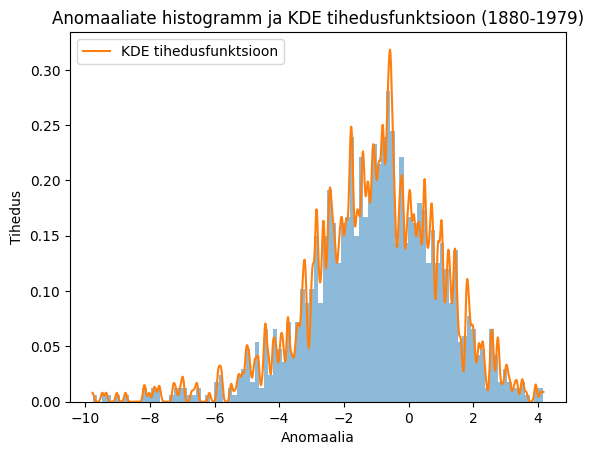

In [140]:
#3. Joonistage KDE tihedusfunktsioon ning anomaaliate histogramm üle kõigi kuude andmestikus d100 (vt. vihjet).

# Selles koodis density=True valib y-telje skaala selliselt, et tulpade pindala väljendab nende proportsionaalset sagedust ehk kasutab tihedusfunktsiooni skaalat. alpha=0.5 teeb tulbad pisut läbipaistvamaks. x_vektor on ühtlaste vahedega väärtused andmete miinimumi ja maksimumi vahel (vt. funktsiooni np.linspace).
x_vektor = np.linspace(d100.anomaalia.min(), d100.anomaalia.max(), 1000)
plt.hist(d100.anomaalia, density=True, bins=100, alpha=0.5)
plt.plot(x_vektor, kde(x_vektor), label='KDE tihedusfunktsioon')
plt.xlabel('Anomaalia')
plt.ylabel('Tihedus')
plt.title('Anomaaliate histogramm ja KDE tihedusfunktsioon (1880-1979)')
plt.legend()
plt.show()

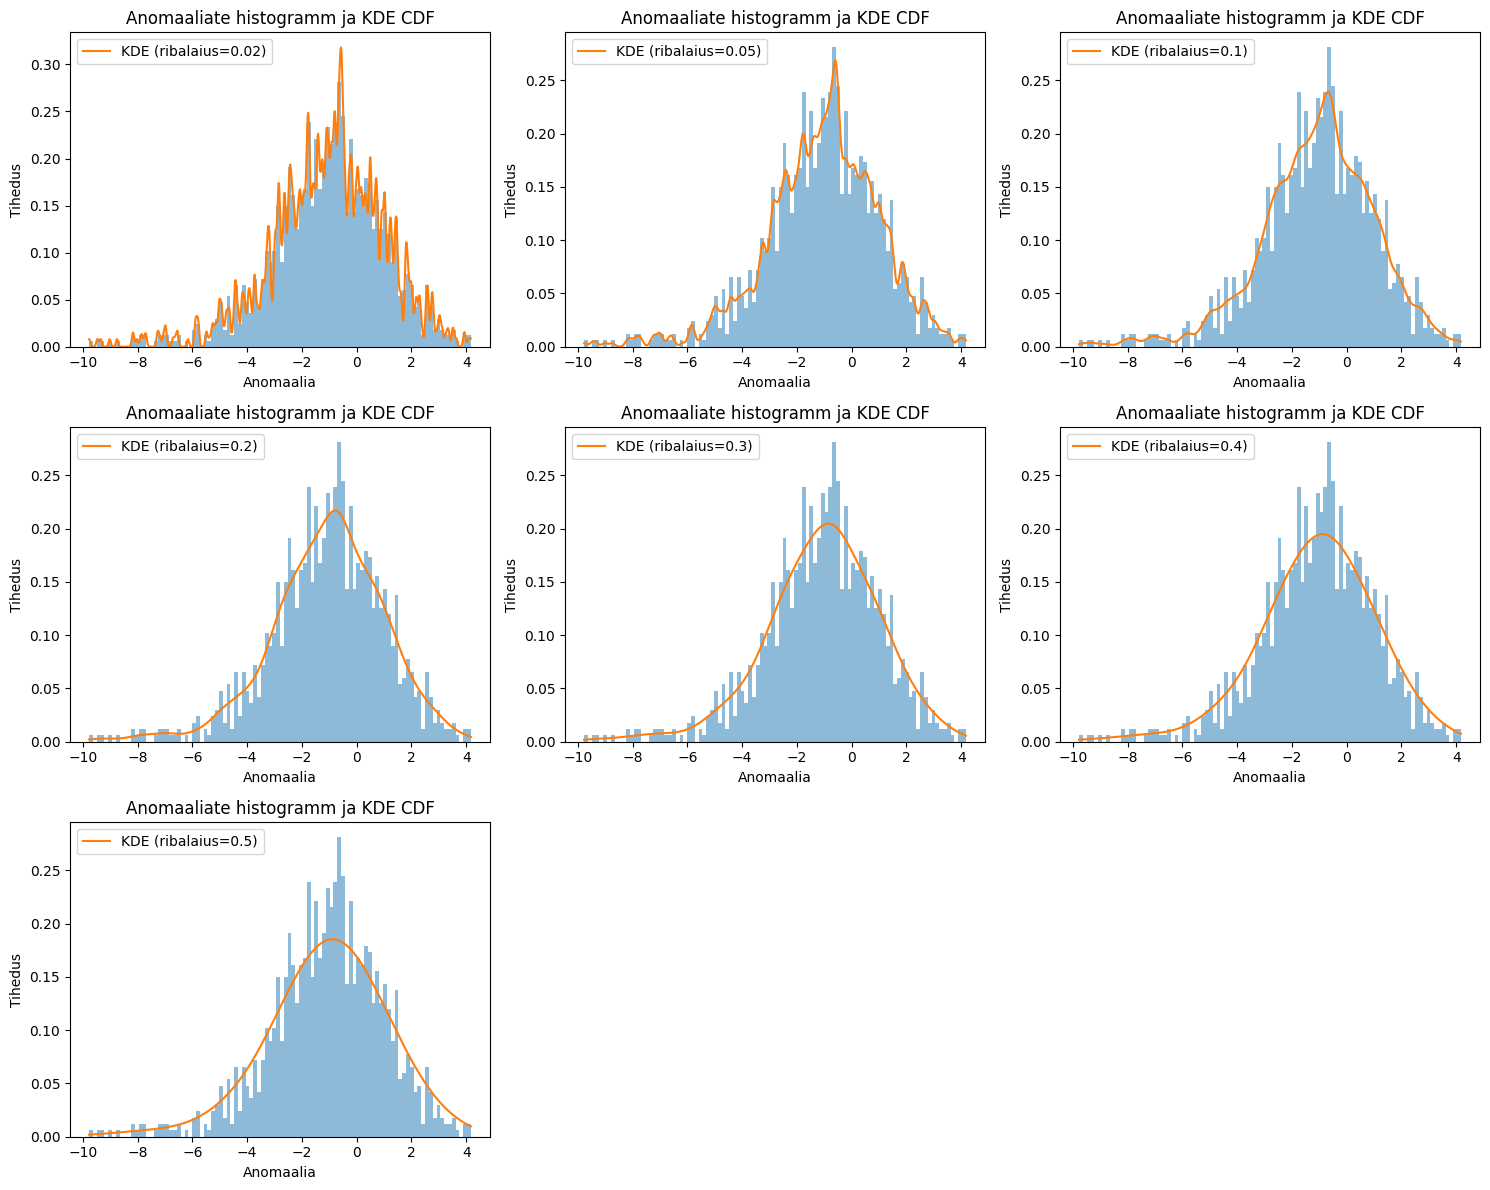

In [141]:
#4. Korrake samme 2 ja 3 seitsme erineva KDE ribalaiusega: 0.02, 0.05, 0.1, 0.2, 0.3, 0.4 ja 0.5. Valige välja selline ribalaiuse parameeter, mis teile silma järgi kõige paremini näib sobivat (ilma mingeid lisaarvutusi tegemata).

(fig, axes) = plt.subplots(3, 3, figsize=(15, 12))
axes_flat = axes.flatten()

for i, ribalaius in enumerate(ribalaiused := [0.02, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]):
    ax = axes_flat[i]
    kde = scipy.stats.gaussian_kde(d100.anomaalia, bw_method=ribalaius)
    x_vektor = np.linspace(d100.anomaalia.min(), d100.anomaalia.max(), 1000)
    ax.hist(d100.anomaalia, density=True, bins=100, alpha=0.5)
    ax.plot(x_vektor, kde(x_vektor), label=f'KDE (ribalaius={ribalaius})')
    ax.set_xlabel('Anomaalia')
    ax.set_ylabel('Tihedus')
    ax.set_title(f'Anomaaliate histogramm ja KDE CDF')
    ax.legend()

for j in range(len(ribalaiused), len(axes_flat)):
    axes_flat[j].axis('off')

plt.tight_layout()
plt.show()

<font color='purple'>**(d) Kui oleme andmetele sobitanud KDE tihedusfunktsiooni, tahaksime järgmisena teada, kui hästi sobib see mudel selliste andmetega, mida sobitamiseks ei kasutatud. Selle jaoks ei tohiks kasutada kogu olemasolevat andmestikku KDE sobitamiseks, vaid osa andmetest tuleks eraldada "treenimiseks" ning osa valideerimiseks. Selle asemel, et tihedusfunktsiooni graafikut histogrammiga võrrelda, arvutame mudeli täpsuse hindamiseks negatiivse log-tõepära (NLL). Negatiivsest log-tõepärast räägitakse lähemalt 5. loengus, kuid järgnevas lõigus on lühike selgitus, mida see tähendab ja kuidas seda arvutada.** </font>

<font color='purple'>**Tõepära on andmepunktide tiheduste korrutis. Olgu meil KDE mudel `kde` ja andmepunktid `x1`, `x2`, `x3`. Siis tõepära on `kde.pdf(x1)*kde.pdf(x2)*kde.pdf(x3)`. Kuna paljude väikeste arvude korrutis läheb kiiresti nulli, siis kasutatakse praktikas log-tõepära, ehk `np.log(kde.pdf(x1))+np.log(kde.pdf(x2))+np.log(kde.pdf(x3))`. Kuna see on tüüpiliselt negatiivne suurus, siis muudetakse sellel tavaliselt märk ning lisaks kasutatakse tavaliselt summa asemel keskmist. Mida väiksem on negatiivne log-tõepära, seda parem on tihedushinnang. Kui andmed on vektoris `andmed`, siis keskmist negatiivset log-tõepära (NLL) saab arvutada nii: `np.mean(-np.log(kde.pdf(andmed)))`.**</font>

<font color='purple'>**JUHISED:**</font>

1. <font color='purple'>**Järjestage andmestik d100 juhuslikult ümber ning jagage juhuslikult kolmeks võrdse suurusega andmestikuks: treeningandmestik, valideerimisandmestik ning testandmestik (kood selleks on allpool antud, palun ärge seda muutke).**</font>

2. <font color='purple'>**Sobitage ainult treeningandmestikul 96 erinevat KDE tihedushinnangut, vastavalt ribalaiuse parameetriga 0.05, 0.06, 0.07, ..., 0.99, 1.00.**</font>
3. <font color='purple'>**Arvutage NLL iga erineva ribalaiuse jaoks ning eraldi treeningandmestikul ja valideerimisandmestikul (kokku seega 96 ribalaiust korda 2 andmestikku ehk 192 NLL väärtust). Põhimõtteliselt on idee selles, et valime ribalaiuse parameetri selliselt, et NLL oleks võimalikult väike.**</font>

4. <font color='purple'>**Tehke joonis, kus x-teljel on ribalaius ja y-teljel NLL ning NLL on visualiseeritud kahe eraldi joonena - üks treening- ning teine valideerimisandmestikul. Tehke joonte kohta ka legend - selleks lisage joont defineerivale `plt.plot` käsule argumendina juurde `label='NLL treeningandmetel'` või `label='NLL valideerimisandmetel'` ning peale seda lisage käsk `plt.legend()`.**</font>

5. <font color='purple'>**Kirjeldage, millises ribalaiuse piirkonnas toimub alasobitamine ja millises ülesobitamine. Millise väärtuse valiksite ribalaiusele ning mis on treening- ja valideerimis-NLL selle ribalaiuse jaoks?**</font>

<font color='purple'>**OODATUD TULEMUS: Joonis, mis näitab NLL mõõtu treening- ning valideerimisandmetel erinevate ribalaiustega. Selgitus, kus on ala- ja ülesobitamise piirkonnad. Selgitus, millise ribalaiuse võiks valida ning mis on selle treening- ja valideerimis-NLL.**</font>

VIHJE: Ala- ja ülesobitamise piirkondi leides tasuks ehk vaadata korraks ka eelmises alapunktis tehtud erinevate ribalaiuste jooniseid vaadata ning mõelda sellele, et kas ribalaiuse kasvades mudeli keerukus kasvab või kahaneb.

**Küsimus praksi juhendajale:**

**_TEHTUD_** : 1/1


In [142]:
# 1.
# 	Järjestage andmestik d100 juhuslikult ümber ning jagage juhuslikult kolmeks võrdse suurusega andmestikuks: treeningandmestik, valideerimisandmestik ning testandmestik (kood selleks on allpool antud, palun ärge seda muutke).

In [143]:
### Palun seda koodi mitte muuta.
d100 = aastafilter(d, 1880, 1979)
indeksid = np.array(d100.index)
rng = np.random.default_rng(0)
rng.shuffle(indeksid)
d100_segiaetud = d100.loc[indeksid,:]
osa_suurus = len(d100_segiaetud)//3
d100_treen = d100_segiaetud[:osa_suurus]
d100_valid = d100_segiaetud[osa_suurus:(2*osa_suurus)]
d100_test = d100_segiaetud[(2*osa_suurus):]

In [144]:
# 2
# 	Sobitage ainult treeningandmestikul 96 erinevat KDE tihedushinnangut, vastavalt ribalaiuse parameetriga 0.05, 0.06, 0.07, ..., 0.99, 1.00.

ribalaiused = np.arange(0.05, 1.01, 0.01)


kde_treen_96 = [
	scipy.stats.gaussian_kde(d100_treen["anomaalia"], bw_method=laius)
	for laius in ribalaiused
]

In [145]:
# 3
#	Arvutage NLL iga erineva ribalaiuse jaoks ning eraldi treeningandmestikul ja valideerimisandmestikul (kokku seega 96 ribalaiust korda 2 andmestikku ehk 192 NLL väärtust). Põhimõtteliselt on idee selles, et valime ribalaiuse parameetri selliselt, et NLL oleks võimalikult väike.

NLL_treen = []
NLL_valid = []

for kde_treen in kde_treen_96:
	treen = np.mean(
		-np.log(
			kde_treen.pdf(
				d100_treen["anomaalia"]
			)
		)
	)
	test = np.mean(
		-np.log(
			kde_treen.pdf(
				d100_valid["anomaalia"]
			)
		)
	)

	NLL_treen.append(treen)
	NLL_valid.append(test)


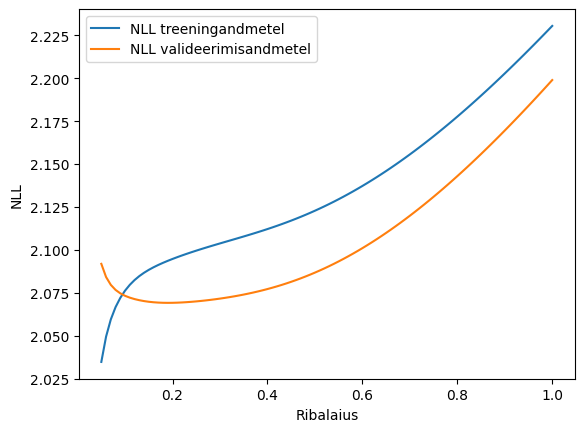

In [146]:
# 4
#	Tehke joonis, kus x-teljel on ribalaius ja y-teljel NLL ning NLL on visualiseeritud kahe eraldi joonena - üks treening- ning teine valideerimisandmestikul.
# 	Tehke joonte kohta ka legend - selleks lisage joont defineerivale plt.plot käsule argumendina juurde label='NLL treeningandmetel' või label='NLL valideerimisandmetel' ning peale seda lisage käsk plt.legend().

plt.plot(ribalaiused, NLL_treen, label='NLL treeningandmetel')
plt.plot(ribalaiused, NLL_valid, label='NLL valideerimisandmetel')
plt.xlabel('Ribalaius')
plt.ylabel('NLL')
plt.legend()
plt.show()

In [147]:
# 4
# 	Kirjeldage, millises ribalaiuse piirkonnas toimub alasobitamine ja millises ülesobitamine. Millise väärtuse valiksite ribalaiusele ning mis on treening- ja valideerimis-NLL selle ribalaiuse jaoks?

# Alasobitamine toimub 0-0.1 juures
# Ülesobitamine on juba 0.4-1

# Ma valiks vast siis 0.2 kuna seal on NNL kõige väiksem valideerimisandmetel ja samas on ka treeningus viga väike

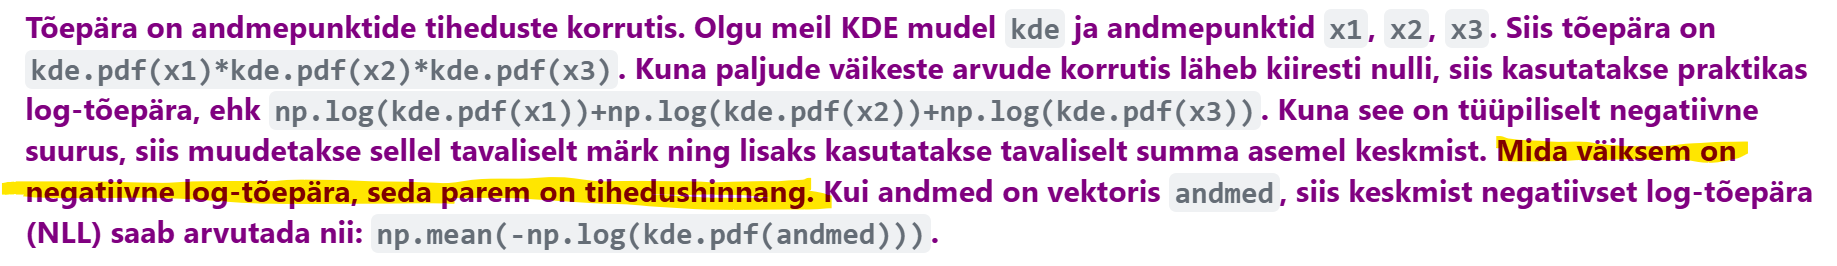


<font color='purple'>**(e) Vahetada treening- ja valideerimisandmestike rollid: see, mis oli enne treeningandmestik, on nüüd valideerimisandmestik, ja vastupidi. Tee samasugune joonis nagu eelmises punktis ning vali parim ribalaius selle uue joonise järgi. Kas parimaks osutus sama või erinev ribalaius? Seejuures salvestage NLL tulemused erinevatesse muutujatesse kui eelmises alapunktis, sest neid läheb järgmises alapunktis vaja.**</font>

<font color='purple'>**OODATUD TULEMUS: Joonis, parim ribalaius ja selgitus, kas see oli sama mis eelmises punktis.**</font>

**Küsimus praksi juhendajale:**

**_TEHTUD_** : 1/1


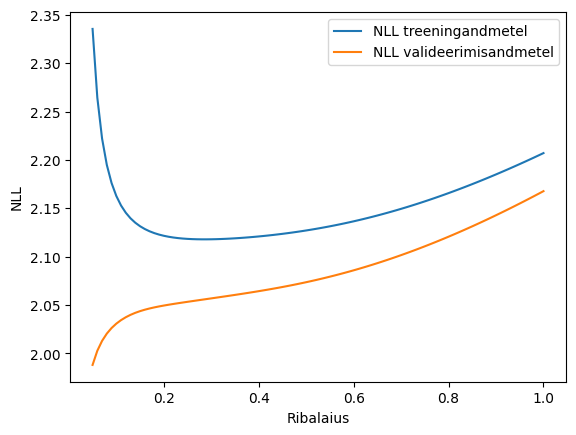

In [148]:
ribalaiused = np.arange(0.05, 1.01, 0.01)


kde_valid_96 = [
	scipy.stats.gaussian_kde(d100_valid["anomaalia"], bw_method=laius)
	for laius in ribalaiused
]


NLL_treen_2 = []
NLL_valid_2 = []

for kde_treen in kde_valid_96:
	treen = np.mean(
		-np.log(
			kde_treen.pdf(
				d100_treen["anomaalia"]
			)
		)
	)
	test = np.mean(
		-np.log(
			kde_treen.pdf(
				d100_valid["anomaalia"]
			)
		)
	)

	NLL_treen_2.append(treen)
	NLL_valid_2.append(test)


plt.plot(ribalaiused, NLL_treen_2, label='NLL treeningandmetel')
plt.plot(ribalaiused, NLL_valid_2, label='NLL valideerimisandmetel')
plt.xlabel('Ribalaius')
plt.ylabel('NLL')
plt.legend()
plt.show()

In [149]:
# Ma ütleks, et üldiselt üpris samad piirkonnad nagu eelnevalt mainitud

<font color='purple'>**(f) Vali parim ribalaius 2-osalise ristvalideeringuga, kasutades kahe eelmise alapunkti tulemusi. Tee joonis, kus on 2 osa peale keskmistatud treening-NLL ja 2 osa peale keskmistatud valideering-NLL erinevate ribalaiuste jaoks. Milline on parim ribalaius ning mis on 2 osa peale keskmistatud treening- ja valideerimis-NLL selle ribalaiuse jaoks?**</font>

<font color='purple'>**OODATUD TULEMUS: Joonis, parim ribalaius ning selle 2 osa peale keskmistatud treening- ja valideerimis-NLL.**</font>

**Küsimus praksi juhendajale:**

**_TEHTUD_** : 1/1


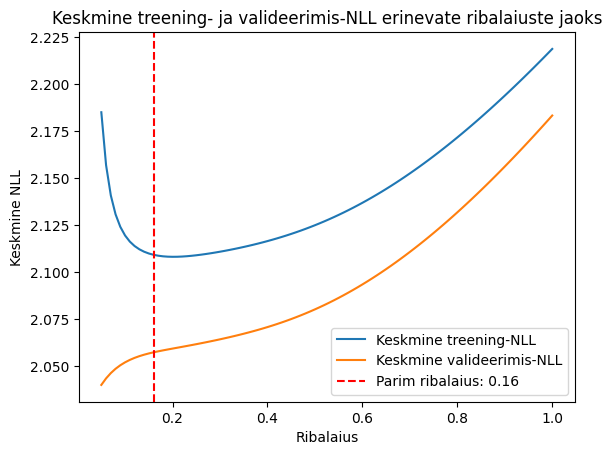

Parim ribalaius: 0.16
Keskmine treening-NLL parima ribalaiuse korral: 2.1093
Keskmine valideerimis-NLL parima ribalaiuse korral: 2.0574


In [150]:

keskmine_NLL_treen = np.mean([NLL_treen, NLL_treen_2], axis=0)
keskmine_NLL_valid = np.mean([NLL_valid, NLL_valid_2], axis=0)

#keskmine_NLL = keskmine_NLL_treen
#keskmine_NLL = keskmine_NLL_valid
keskmine_NLL = np.mean([keskmine_NLL_treen, keskmine_NLL_valid], axis=0)



parim_indeks = np.argmin(keskmine_NLL)
parim_ribalaius = ribalaiused[parim_indeks]
parim_treen_NLL = keskmine_NLL_treen[parim_indeks]
parim_valid_NLL = keskmine_NLL_valid[parim_indeks]


plt.plot(ribalaiused, keskmine_NLL_treen, label='Keskmine treening-NLL')
plt.plot(ribalaiused, keskmine_NLL_valid, label='Keskmine valideerimis-NLL')
plt.axvline(parim_ribalaius, color='red', linestyle='--', label=f'Parim ribalaius: {parim_ribalaius:.2f}')
plt.xlabel('Ribalaius')
plt.ylabel('Keskmine NLL')
plt.title('Keskmine treening- ja valideerimis-NLL erinevate ribalaiuste jaoks')
plt.legend()
plt.show()


print(f"Parim ribalaius: {parim_ribalaius:.2f}")
print(f"Keskmine treening-NLL parima ribalaiuse korral: {parim_treen_NLL:.4f}")
print(f"Keskmine valideerimis-NLL parima ribalaiuse korral: {parim_valid_NLL:.4f}")

<font color='purple'>**(g) Hinnata 2-osalise ristvalideeringuga, kui hea on KDE tihedushinnang vaikeparameetritega (ehk jättes `bw_method` parameetri üldse panemata). Selleks keskmistada mõlema osa valideering-NLL. Kas tulemus on parem või halvem kui parimal ribalaiusel eelmises alapunktis?**</font>

<font color='purple'>**OODATUD TULEMUS: Vaikeparameetritega KDE tihedushinnagu valideering-NLL, hinnatuna 2-osalise ristvalideeringuga. Võrdlus, kas see on parem või halvem kui eelmises alapunktis.**</font>

**Küsimus praksi juhendajale:**

**_TEHTUD_** : 1/1


In [151]:
# Lahendus

kde_treen = scipy.stats.gaussian_kde(d100_treen["anomaalia"])
kde_valid = scipy.stats.gaussian_kde(d100_valid["anomaalia"])

NLL_treen_def = np.mean(
	-np.log(
		kde_treen.pdf(
			d100_treen["anomaalia"]
		)
	)
)
NLL_valid_def = np.mean(
	-np.log(
		kde_valid.pdf(
		#kde_treen.pdf(
			d100_valid["anomaalia"]
		)
	)
)

keskmine_NLL_def = np.mean([NLL_treen_def, NLL_valid_def])

print(f"Vaikeparameetritega parim (keskmine) NLL: \t{keskmine_NLL_def:.4f}")
print("")
print(f"Eelmise alapunkti valideerimis-NLL: \t\t{parim_valid_NLL:.4f}")
print(f"Eelmise alapunkti parim ribalaius: \t\t{parim_ribalaius:.2f}")


Vaikeparameetritega parim (keskmine) NLL: 	2.0805

Eelmise alapunkti valideerimis-NLL: 		2.0574
Eelmise alapunkti parim ribalaius: 		0.16


In [152]:
# Tundub eelmises punktis oli väiksem NLL

<font color='purple'>**(h) Panna kokku treening- ja valideerimisandmestikud üheks andmestikuks ning leida sellel 2 erinevat KDE tihedushinnangut - üks punktis (f) leitud parima ribalaiusega ning teine vaikimisi parameetritega. Mõõta nende sobivust mõõduga NLL testandmetel. Kumb meetod on parem? Kas sama meetod, mis osutus parimaks eelmises alapunktis (g) või teine meetod? Kas see on üllatav või mitte?**</font>

<font color='purple'>**OODATUD TULEMUS: Test-NLL kahe meetodiga, võrdlus kumb on parem ning selgitus kas järjestus on üllatav või mitte.**</font>

**Küsimus praksi juhendajale:**

**_TEHTUD_** : 1/1


In [153]:
d100_treening_valid = pd.concat([d100_treen, d100_valid])

kde_parim = scipy.stats.gaussian_kde(d100_treening_valid["anomaalia"], bw_method=parim_ribalaius)
kde_def = scipy.stats.gaussian_kde(d100_treening_valid["anomaalia"])


NLL_test_parim = np.mean(-np.log(kde_parim.pdf(d100_test["anomaalia"])))
NLL_test_def = np.mean(-np.log(kde_def.pdf(d100_test["anomaalia"])))


print(f"Test-NLL parima ribalaiusega ({parim_ribalaius:.2f}): \t{NLL_test_parim:.4f}")
print(f"Test-NLL vaikeparameetritega: \t\t{NLL_test_def:.4f}")


Test-NLL parima ribalaiusega (0.16): 	2.1839
Test-NLL vaikeparameetritega: 		2.1719


In [154]:
# Def paramitega on parem kui parima ribalaiusega
# See on tõesti üllatav tulemus

# 2. ülesanne. Kliimamudelid Tartu kohta - Kolmogorov-Smirnovi test ja autokorrelatsion (2,25 punkti)


<font color='purple'>**(a) Hetkel on kõik anomaaliad arvutatud aastate 1981-2010 järgi. Kuna tahame uurida kliimamuutusi, võtame baasperioodiks hoopis saja-aastase ajaperioodi 1880-1979 ning arvutame kõik anomaaliad uuesti selle perioodi keskmiste järgi.**</font>

<font color='purple'>**JUHISED:**</font>

1. <font color='purple'>**Arvutage keskmine jaanuari anomaalia üle kõigi baasperioodi aastate ehk üle 1981-2010. See peaks tulema väga väike arv (alla 0.01), sest selle ajavahemiku suhtes arvutataksegi anomaaliaid. Kõik kuudekaupa keskmised anomaaliad üle 1981-2010 saate arvutada nii: `aastafilter(d,1981,2010).groupby('kuu')['anomaalia'].mean()`.**</font>

2. <font color='purple'>**Arvutage ajavahemiku 1880-1979 jaanuarikuine keskmine anomaalia ning seejärel lahutage saadud väärtus maha kõigist jaanuarikuistest anomaaliatest. Sarnaselt arvutage ajavahemiku 1880-1979 veebruarikuine keskmine anomaalia ning seejärel lahutage saadud väärtus maha kõigist veebruarikuistest anomaaliatest. Ja nõnda tehke kõigi kuude jaoks. Näiteks jaanuarikuu puhul saab sellise lahutamise teha nii: `d.loc[d.kuu==1,'anomaalia_1880_1979'] = d.loc[d.kuu==1,'anomaalia'] - keskmine`, kus `keskmine` on ajavahemiku 1880-1979 jaanuarikuine keskmine anomaalia. Soovitatav on see `keskmine` ümardada sajandikeni (`keskmine = np.round(keskmine,2)`), kuna andmetes on kõik anomaaliad mõõdetud sajandikes.**</font>
3. <font color='purple'>**Väljastage lõpptulemusena aasta 2020 anomaaliad - kui kõik õigesti tegite, siis need peaksid saja-aastase baasperioodi suhtes tulema ligikaudu +8.16 (jaanuar), +7.42 (veebruar), +5.41 (märts), +1.76 (aprill), -0.17 (mai) jne. Näiteks mai 2020 oli seega baasperioodi keskmisest külmem!**</font>

<font color='purple'> **OODATUD TULEMUS: Keskmine jaanuari anomaalia üle aastate 1981-2010. Aasta 2020 kuude anomaaliad 100-aastase baasperioodi 1880-1979 suhtes.**</font>

**Küsimus praksi juhendajale:**

**_TEHTUD_** : 1/1


In [155]:
# 1
# 	Arvutage keskmine jaanuari anomaalia üle kõigi baasperioodi aastate ehk üle 1981-2010. See peaks tulema väga väike arv (alla 0.01), sest selle ajavahemiku suhtes arvutataksegi anomaaliaid. Kõik kuudekaupa keskmised anomaaliad üle 1981-2010 saate arvutada nii: aastafilter(d,1981,2010).groupby('kuu')['anomaalia'].mean()

kuude_keskmine_anomaalia = aastafilter(d, 1981, 2010).groupby('kuu')['anomaalia'].mean()


In [156]:
kuude_keskmine_anomaalia.head()

kuu
1    0.000333
2   -0.000667
3   -0.000333
4    0.000667
5    0.000667
Name: anomaalia, dtype: float64

In [157]:
# 2
# 	Arvutage ajavahemiku 1880-1979 jaanuarikuine keskmine anomaalia ning seejärel lahutage saadud väärtus maha kõigist jaanuarikuistest anomaaliatest. Sarnaselt arvutage ajavahemiku 1880-1979 veebruarikuine keskmine anomaalia ning seejärel lahutage saadud väärtus maha kõigist veebruarikuistest anomaaliatest. Ja nõnda tehke kõigi kuude jaoks. Näiteks jaanuarikuu puhul saab sellise lahutamise teha nii: d.loc[d.kuu==1,'anomaalia_1880_1979'] = d.loc[d.kuu==1,'anomaalia'] - keskmine, kus keskmine on ajavahemiku 1880-1979 jaanuarikuine keskmine anomaalia. Soovitatav on see keskmine ümardada sajandikeni (keskmine = np.round(keskmine,2)), kuna andmetes on kõik anomaaliad mõõdetud sajandikes.


for kuu in range(1, 13):
	keskmine_anomaalia_1880_1979 = np.mean(
		d.loc[(d.aasta >= 1880) & (d.aasta <= 1979) & (d.kuu == kuu), 'anomaalia']
	)
	d.loc[d.kuu == kuu, 'anomaalia_1880_1979'] = d.loc[d.kuu == kuu, 'anomaalia'] - np.round(keskmine_anomaalia_1880_1979, 2)


In [158]:
# 3
# 	Väljastage lõpptulemusena aasta 2020 anomaaliad - kui kõik õigesti tegite, siis need peaksid saja-aastase baasperioodi suhtes tulema ligikaudu +8.16 (jaanuar), +7.42 (veebruar), +5.41 (märts), +1.76 (aprill), -0.17 (mai) jne. Näiteks mai 2020 oli seega baasperioodi keskmisest külmem!

d_2020 = d[d.aasta == 2020][['kuu', 'anomaalia_1880_1979']]
d_2020

,kuu,anomaalia_1880_1979
1680,1,8.16
1681,2,7.42
1682,3,5.41
1683,4,1.76
1684,5,-0.17
1685,6,3.62
1686,7,-0.07
1687,8,1.37


<font color='red'> **NB! Järgmistes alamülesannetes toimub anomaaliate võrdlus baasperioodi 1880-1979 suhtes, seega kasutage andmestiku veergu `anomaalia_1880_1979`.**</font>


<font color='purple'>**(b) Püüame hinnata, millal kliimasoojenemine algas.**</font>

<font color='purple'>**JUHISED:**</font>

1. <font color='purple'>**Samal andmestikul `d` nagu eelmises ülesandes, leida iga aastakümne kohta (1880-1889, 1890-1899, 1900-1909, ..., 2010-2019) keskmine anomaalia (ehk kuude anomaaliate aritmeetiline keskmine).**</font>

2. <font color='purple'>**Teha joonis, kus x-teljel on aastakümned ja y-teljel keskmised anomaaliad.**</font>

3. <font color='purple'>**Millal algas teie arvates kliimasoojenemine selle joonise järgi? Mitu kraadi on kliima juba soojenenud, Tartu näitel?**</font>

<font color='purple'>**OODATUD TULEMUS: Joonis ja teie arvamus.**</font>

**Küsimus praksi juhendajale:**

**_TEHTUD_** : 1/1


In [159]:
# 1
# 	Samal andmestikul d nagu eelmises ülesandes, leida iga aastakümne kohta (1880-1889, 1890-1899, 1900-1909, ..., 2010-2019) keskmine anomaalia (ehk kuude anomaaliate aritmeetiline keskmine).

samm = 10

aastakümned = [(aasta, aasta + samm - 1) for aasta in range(1880, 2020, samm)]

kesmine_anomaalia_aastakümnetes = [
	np.mean(
		d.loc[
			(d.aasta >= algus) & (d.aasta <= lõpp),
			'anomaalia_1880_1979'
		]
	)
	for (algus, lõpp) in aastakümned
]

for i in range(len(aastakümned)):
	(algus, lõpp) = aastakümned[i]
	keskmine = kesmine_anomaalia_aastakümnetes[i]
	print(f"{algus}-{lõpp} keskmine anomaalia: \t{keskmine:.4f}")

1880-1889 keskmine anomaalia: 	-0.4708
1890-1899 keskmine anomaalia: 	-0.1068
1900-1909 keskmine anomaalia: 	-0.2066
1910-1919 keskmine anomaalia: 	-0.1320
1920-1929 keskmine anomaalia: 	-0.1358
1930-1939 keskmine anomaalia: 	0.6977
1940-1949 keskmine anomaalia: 	-0.0984
1950-1959 keskmine anomaalia: 	0.0684
1960-1969 keskmine anomaalia: 	0.0220
1970-1979 keskmine anomaalia: 	0.3475
1980-1989 keskmine anomaalia: 	0.4193
1990-1999 keskmine anomaalia: 	1.0667
2000-2009 keskmine anomaalia: 	1.6080
2010-2019 keskmine anomaalia: 	1.8397


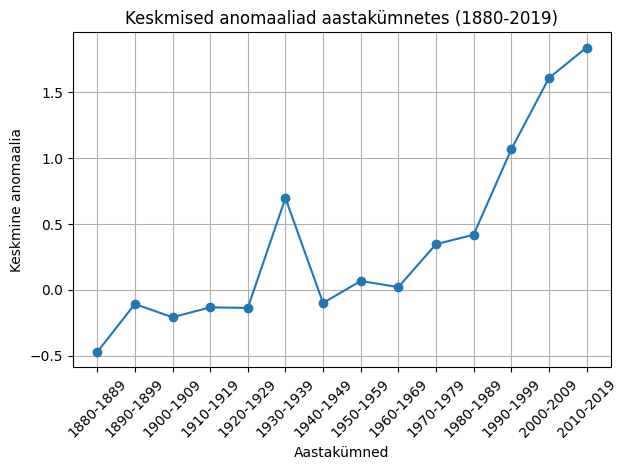

In [160]:
# 2
# 	Teha joonis, kus x-teljel on aastakümned ja y-teljel keskmised anomaaliad.

plt.plot(
	[
		f"{algus}-{lõpp}"
		for (algus, lõpp) in aastakümned
	],
	kesmine_anomaalia_aastakümnetes,
	marker='o'
)
plt.xlabel('Aastakümned')
plt.ylabel('Keskmine anomaalia')
plt.title('Keskmised anomaaliad aastakümnetes (1880-2019)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [161]:
kesmine_anomaalia_aastakümnetes[len(kesmine_anomaalia_aastakümnetes)-1]

np.float64(1.83975)

In [162]:
np.max(kesmine_anomaalia_aastakümnetes)

np.float64(1.83975)

In [163]:
# 3
# 	Millal algas teie arvates kliimasoojenemine selle joonise järgi? Mitu kraadi on kliima juba soojenenud, Tartu näitel?

# Ma ütleks alates 1980+
# soojenenud on ca 1,83975 kraadi

<font color='purple'>**(c) Nüüd uurime, kas aastatele 1880-1979 sobitatud KDE kirjeldab hästi ka hilisemaid kümnendeid.**</font>

<font color='purple'>**JUHISED:**</font>

1. <font color='purple'>**Sobitage vaikimisi parameetritega KDE tihedushinnang kõikidele anomaaliatele ajavahemikus 1880-1979.**</font>

2. <font color='purple'>**Tehke 2 joonist, vastavalt anomaaliate histogrammiga kümnendi 1990-1999 kohta ning kümnendi 2010-2019 kohta.**</font>

3. <font color='purple'>**Mõlemile joonisele lisage KDE tihedushinnang.**</font>

4. <font color='purple'>**Kas jooniste järgi näib teile pigem, et andmed on KDE mudelile vastavad või mitte (ehk kas sellest KDE mudelist on tõenäoline saada selliseid andmeid või mitte)?**</font>

<font color='purple'>**OODATUD TULEMUS: 2 joonist ja selgitus, kas teie silma järgi vastavad andmed mudelile või mitte (1-3 lauset).**</font>

**Küsimus praksi juhendajale:**

**_TEHTUD_** : 1/1


In [164]:
# 1
# 	Sobitage vaikimisi parameetritega KDE tihedushinnang kõikidele anomaaliatele ajavahemikus 1880-1979.

# TODO: Kas siin on mõeldud kõik aastad? Või ainult 1880-1979?

anomaaliad_1880_1979 = aastafilter(d, 1880, 1979)["anomaalia_1880_1979"]

anomaalia_1880_1979_kde = scipy.stats.gaussian_kde(anomaaliad_1880_1979)

#anomaalia_1880_1979_kde = scipy.stats.gaussian_kde(d["anomaalia_1880_1979"])

In [165]:
# 2
# 	Tehke 2 joonist, vastavalt anomaaliate histogrammiga kümnendi 1990-1999 kohta ning kümnendi 2010-2019 kohta.

# 3
# 	Mõlemile joonisele lisage KDE tihedushinnang.

_1990_1999 = aastafilter(d, 1990, 1999)
_2010_2019 = aastafilter(d, 2010, 2019)


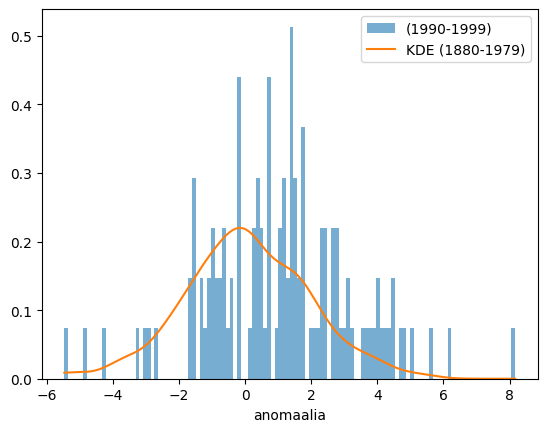

In [166]:
x_vektor = np.linspace(_1990_1999['anomaalia_1880_1979'].min(), _1990_1999['anomaalia_1880_1979'].max(), 1000)

plt.hist(
	_1990_1999['anomaalia_1880_1979'],
	density=True,
	bins=12*10,
	alpha=0.6,
	label='(1990-1999)'
)
plt.plot(x_vektor, anomaalia_1880_1979_kde(x_vektor), label='KDE (1880-1979)')
plt.xlabel('anomaalia')
plt.legend()
plt.show()


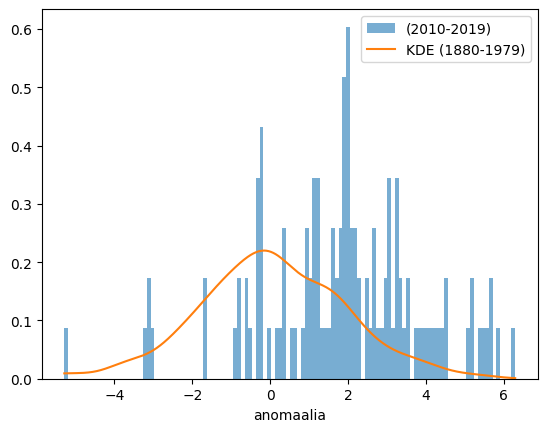

In [167]:
x_vektor = np.linspace(_2010_2019['anomaalia_1880_1979'].min(), _2010_2019['anomaalia_1880_1979'].max(), 1000)


plt.hist(
	_2010_2019['anomaalia_1880_1979'],
	density=True,
	bins=12*10,
	alpha=0.6,
	label='(2010-2019)'
)
plt.plot(x_vektor, anomaalia_1880_1979_kde(x_vektor), label='KDE (1880-1979)')
plt.xlabel('anomaalia')
plt.legend()
plt.show()

In [168]:
# 4
# 	Kas jooniste järgi näib teile pigem, et andmed on KDE mudelile vastavad või mitte (ehk kas sellest KDE mudelist on tõenäoline saada selliseid andmeid või mitte)?

# Ma arvan, et on näha mingit sarnasust aga pigem on 2010-2019 rohkem nihkes paremale ehk siis soojenemine on toimunud. Seega ei tundu, et andmed oleksid KDE mudelile vastavad.

<font color='purple'>**(d) Kui eelnevates ülesannetes uurisime KDE tihedusfunktsiooni vastavust andmetele, siis nüüd uurime jaotusfunktsiooni. Jaotusfunktsioone võrreldakse Kolmogorov-Smirnovi statistiku abil. Et aru saada, kuidas see töötab, arvutame selle käsitsi välja ilma `scipy`'t kasutamata.**</font>

<font color='purple'>**JUHISED:**</font>

1. <font color='purple'>**Sobitage vaikimisi parameetritega KDE tihedushinnang kõikidele anomaaliatele ajavahemikus 1880-1979.**</font>

2. <font color='purple'>**Arvutage empiiriline jaotusfunktsioon kümnendite 1990-1999 ja 2010-2019 anomaaliate kohta.**</font>

3. <font color='purple'>**Mõlema empiirilise jaotusfunktsiooni jaoks arvutage välja koht, mille korral on selle ning KDE jaotusfunktsiooni erinevus suurim.**</font>

4. <font color='purple'>**Tehke mõlema kümnendi kohta joonis, millel on koos empiiriline jaotusfunktsioon ning KDE jaotusfunktsioon. Märkige joonistel suurima erinevusega koht ära (näiteks suur punkt mõlemil joonel vastavas kohas või vertikaalne joon nende punktide vahel).**</font>

<font color='purple'>**OODATUD TULEMUS: 2 joonist ning mõlemi kohta anomaalia väärtus, mille korral on empiirilise jaotusfunktsiooni ning KDE jaotusfunktsiooni erinevus suurim (kirjutada välja nii anomaalia väärtus kui vastaval kohal jaotusfunktsioonide vaheline erinevus).**</font>

VIHJE:

-   Kui KDE on leitud meetodiga `kde = scipy.stats.gaussian_kde(d100.anomaalia_1880_1979)`, siis jaotusfunktsiooni joonistamiseks võtke `x_vektor` ühtlaste vahedega andmete miinimumi ja maksimumi vahel (vt. ka eelmise ülesande alapunkti 1c) ja seejärel leidke vastavad jaotusfunktsiooni väärtused järgmiselt: `[kde.integrate_box(-np.inf,x) for x in x_vektor]`.

-   Empiirilise jaotusfunktsiooni arvutamiseks kohal x leidke, kui suur on andmete järgi tõenäosus, et anomaalia on väiksem või võrdne kui x. Teisisõnu `[np.sum(anomaaliad <= x) / len(anomaaliad) for x in x_vektor]`, kus `anomaaliad` on vastava kümnendi andmetes veerg `anomaalia_1880_1979`.

**Küsimus praksi juhendajale:**

**_TEHTUD_** : 1/1


In [169]:
# 1
# 	Sobitage vaikimisi parameetritega KDE tihedushinnang kõikidele anomaaliatele ajavahemikus 1880-1979.

anomaaliad_1880_1979 = aastafilter(d, 1880, 1979)["anomaalia_1880_1979"]

anomaalia_1880_1979_kde = scipy.stats.gaussian_kde(anomaaliad_1880_1979)

In [170]:
# 2
# 	Arvutage empiiriline jaotusfunktsioon kümnendite 1990-1999 ja 2010-2019 anomaaliate kohta.


KDE CDF (jaotus-fnc):
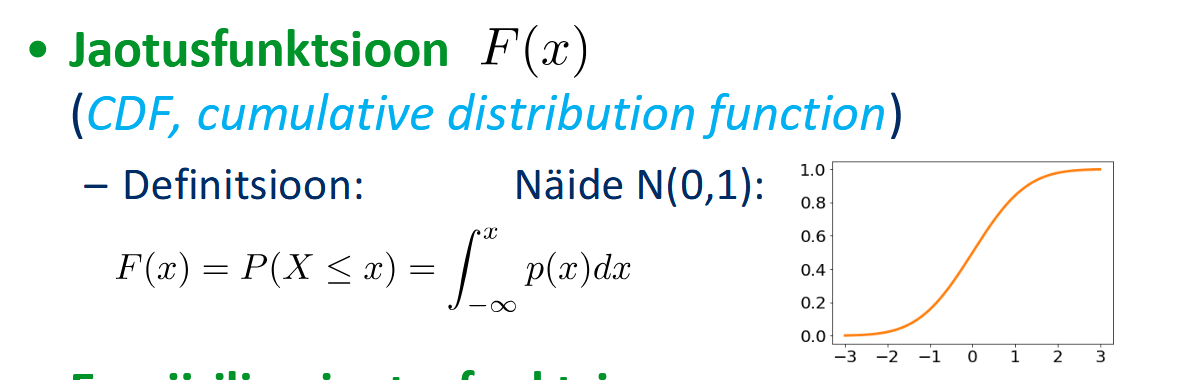

EMP CDF:
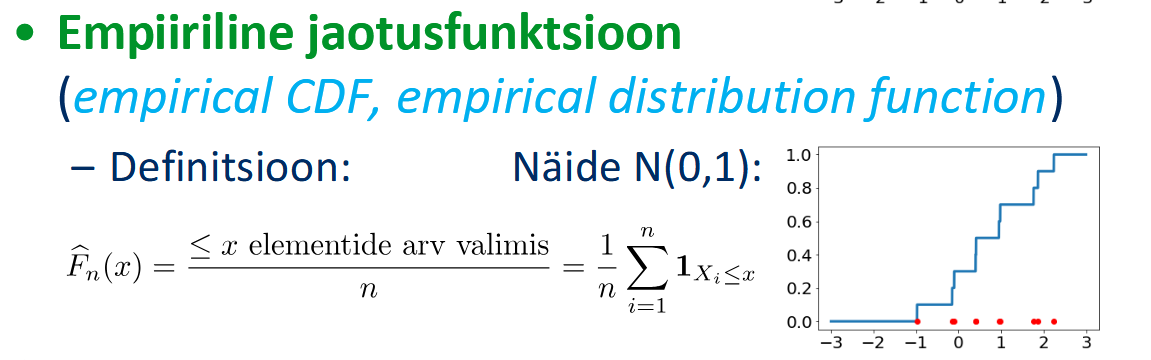


In [171]:
_1990_1999 = aastafilter(d, 1990, 1999)
_2010_2019 = aastafilter(d, 2010, 2019)

x_vektor_1990_1999 = np.linspace(_1990_1999['anomaalia_1880_1979'].min(), _1990_1999['anomaalia_1880_1979'].max(), 1000)
x_vektor_2010_2019 = np.linspace(_2010_2019['anomaalia_1880_1979'].min(), _2010_2019['anomaalia_1880_1979'].max(), 1000)


F_emp_1990_1999 = np.array([
	np.mean(_1990_1999['anomaalia_1880_1979'] <= x)
	for x in x_vektor_1990_1999
])

F_emp_2010_2019 = np.array([
	np.mean(_2010_2019['anomaalia_1880_1979'] <= x)
	for x in x_vektor_2010_2019
])

In [172]:
# 3
# 	Mõlema empiirilise jaotusfunktsiooni jaoks arvutage välja koht, mille korral on selle ning KDE jaotusfunktsiooni erinevus suurim.

#F_max_diff_1990_1999 = scipy.stats.kstest(
#	_1990_1999['anomaalia_1880_1979'],
#	anomaalia_1880_1979_kde
#)

#F_max_diff_1990_1999

#F_max_diff_1990_1999 = np.max(
#	np.abs(
#		F_emp_1990_1999 - anomaalia_1880_1979_kde.integrate_box_1d(
#			-x_vektor_1990_1999,
#			x_vektor_1990_1999
#		)
#	)
#)

F_kde_1990_1999 = np.array([
    anomaalia_1880_1979_kde.integrate_box(-np.inf, x) #integrate_box_1d
    for x in x_vektor_1990_1999
])

kde_emp_diff_1990_1999 = np.abs(F_emp_1990_1999 - F_kde_1990_1999)
max_diff_index_1990_1999 = np.argmax(kde_emp_diff_1990_1999)
F_max_diff_1990_1999 = x_vektor_1990_1999[max_diff_index_1990_1999]
max_diff_value_1990_1999 = kde_emp_diff_1990_1999[max_diff_index_1990_1999]

print(f"1990-1999: Maksimum erinevus kohal {F_max_diff_1990_1999:.4f}, erinevus {max_diff_value_1990_1999:.4f}")



F_kde_2010_2019 = np.array([
    anomaalia_1880_1979_kde.integrate_box(-np.inf, x)
    for x in x_vektor_2010_2019
])

kde_emp_diff_2010_2019= np.abs(F_emp_2010_2019 - F_kde_2010_2019)
max_diff_index_2010_2019 = np.argmax(kde_emp_diff_2010_2019)
F_max_diff_2010_2019 = x_vektor_2010_2019[max_diff_index_2010_2019]
max_diff_value_2010_2019 = kde_emp_diff_2010_2019[max_diff_index_2010_2019]

print(f"2010-2019: Maksimum erinevus kohal {F_max_diff_2010_2019:.4f}, erinevus {max_diff_value_2010_2019:.4f}")


1990-1999: Maksimum erinevus kohal 1.0974, erinevus 0.2364
2010-2019: Maksimum erinevus kohal 0.9517, erinevus 0.4283


In [173]:
# 4
# 	Tehke mõlema kümnendi kohta joonis, millel on koos empiiriline jaotusfunktsioon ning KDE jaotusfunktsioon. Märkige joonistel suurima erinevusega koht ära (näiteks suur punkt mõlemil joonel vastavas kohas või vertikaalne joon nende punktide vahel).


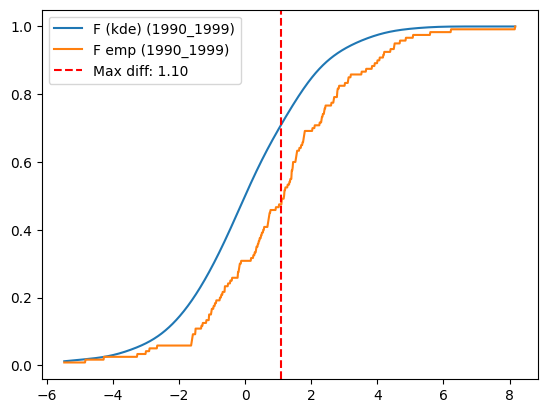

In [174]:
plt.plot(x_vektor_1990_1999, F_kde_1990_1999, label='F (kde) (1990_1999)')
plt.plot(x_vektor_1990_1999, F_emp_1990_1999, label='F emp (1990_1999)')
plt.axvline(F_max_diff_1990_1999, color='red', linestyle='--', label=f'Max diff: {F_max_diff_1990_1999:.2f}')
plt.legend()
plt.show()

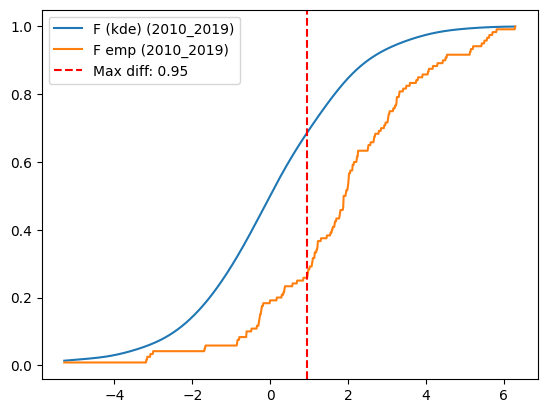

In [175]:
plt.plot(x_vektor_2010_2019, F_kde_2010_2019, label='F (kde) (2010_2019)')
plt.plot(x_vektor_2010_2019, F_emp_2010_2019, label='F emp (2010_2019)')
plt.axvline(F_max_diff_2010_2019, color='red', linestyle='--', label=f'Max diff: {F_max_diff_2010_2019:.2f}')
plt.legend()
plt.show()

<font color='purple'>**(e) Nüüd teeme Kolmogorov-Smirnovi testi `scipy` abil.**</font>

<font color='purple'>**JUHISED:**</font>

1. <font color='purple'>**Viige läbi 1-valimiline Kolmogorov-Smirnovi test (`scipy.stats.ks_1samp`: [link dokumentatsioonile](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_1samp.html)) võrdlemaks kümnendi 1990-1999 anomaaliate empiirilist jaotust aastasaja 1880-1979 KDE-jaotusega (vaikimisi parameetritega).**</font>

2. <font color='purple'>**Kontrollige, kas statistiku väärtus on enam-vähem sama, mis eelmises alapunktis leitud suurim erinevus.**</font>

3. <font color='purple'>**Korrake samme 1. ja 2. võrdlemaks kümnendit 2010-2019 aastasajaga 1880-1979.**</font>

4. <font color='purple'>**Kas leitud p-väärtused lükkavad ümber väite et kümnendi 1990-1999 (või 2010-2019) anomaaliad vastavad aastasaja 1880-1979 mudelile? Mida sellest järeldada kliimasoojenemise kohta?**</font>

<font color='purple'>**OODATUD TULEMUS: Kolmogorov-Smirnovi testi tulemused, statistiku väärtuse kontroll eelmise alapunktiga, p-väärtuste tõlgendamine ja järeldused.** </font>

VIHJE:

1. `scipy.stats.ks_1samp` teiseks parameetriks on vaja panna KDE jaotusfunktsioon. Selleks sobib `kde_cdf`, mille saab eelnevalt defineerida nii: `kde_cdf = lambda x: np.array([kde.integrate_box(-np.inf,x) for x in x_vektor])`, kus `kde` on funktsiooniga `scipy.stats.gaussian_kde` saadud sobitamise tulemus.</font>

2. Testi tegemiseks kirjutage `testi_tulemus = scipy.stats.ks_1samp(...)`, kus `...` asemele kirjutage parameetrid. `testi_tulemus` on objekt, mille kaudu saab kätte KS statistiku ja p-väärtuse. Et täpselt teada kuidas, avage `scipy.stats.ks_1samp` [dokumentatsioon](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_1samp.html), kerige natuke allapoole ja vaadake "Returns:" osa. Näiteks `testi_tulemus.statistic_location` annab selle koha x-teljel, millel asub jaotusfunktsioonide suurim erinevus.

**Küsimus praksi juhendajale:**

**_TEHTUD_** : 1/1


In [212]:
# Lahendus

# 1-2
# 	Viige läbi 1-valimiline Kolmogorov-Smirnovi test (scipy.stats.ks_1samp: link dokumentatsioonile) võrdlemaks kümnendi 1990-1999 anomaaliate empiirilist jaotust aastasaja 1880-1979 KDE-jaotusega (vaikimisi parameetritega).

#	Kontrollige, kas statistiku väärtus on enam-vähem sama, mis eelmises alapunktis leitud suurim erinevus.

#kde_cdf = lambda x: np.array([kde.integrate_box(-np.inf, xi) for xi in x_vektor_1990_1999])
kde_cdf = lambda x: np.array([anomaalia_1880_1979_kde.integrate_box(-np.inf, xi) for xi in x])


ks_test_1990_1999 = scipy.stats.ks_1samp(
	_1990_1999['anomaalia_1880_1979'],
	kde_cdf
	#lambda _: F_kde_1990_1999
)

print(f"Minu leitud statistik: \t{max_diff_value_1990_1999:.4f}")
print(f"KS test statistik: \t{ks_test_1990_1999.statistic:.4f}")

Minu leitud statistik: 	0.2364
KS test statistik: 	0.2368


In [ ]:
# Statistik on sama!! OMG :O

In [214]:
# 3
#	Korrake samme 1. ja 2. võrdlemaks kümnendit 2010-2019 aastasajaga 1880-1979.

kde_cdf = lambda x: np.array([anomaalia_1880_1979_kde.integrate_box(-np.inf, xi) for xi in x])

ks_test_2010_2019 = scipy.stats.ks_1samp(
	_2010_2019['anomaalia_1880_1979'],
	kde_cdf
	#lambda _: F_kde_2010_2019
)

print(f"Minu leitud statistik: \t{max_diff_value_2010_2019:.4f}")
print(f"KS test statistik: \t{ks_test_2010_2019.statistic:.4f}")

Minu leitud statistik: 	0.4283
KS test statistik: 	0.4297


In [ ]:
# 4
# 	Kas leitud p-väärtused lükkavad ümber väite et kümnendi 1990-1999 (või 2010-2019) anomaaliad vastavad aastasaja 1880-1979 mudelile? Mida sellest järeldada kliimasoojenemise kohta?

# Ei lükka ümber, kuna leitud statistikud on samad nii minu mudelis kui ka KS testis. Seega võib öelda, et anomaaliad vastavad mudelile.'
# Kliimasoojenemine on toimunud, kuna statistiku väärtused on suuremaks läinud.

<font color='purple'>**(f) Kasutame 2-valimilist Kolmogorov-Smirnovi testi, et kindlaks teha kas kaks empiirilist jaotusfunktsiooni kirjeldavad sama jaotust või mitte.**</font>

<font color='purple'>**JUHISED:**</font>

1. <font color='purple'>**Tehke 2 joonist, kus ühel on kümnendi 1990-1999 ja teisel kümnendi 2010-2019 empiiriline jaotusfunktsioon.**</font>

2. <font color='purple'>**Võrdluseks lisada mõlemale joonisele aastasaja 1880-1979 empiiriline jaotusfunktsioon.**</font>

3. <font color='purple'>**Viige läbi 2-valimiline Kolmogorov-Smirnovi test ([`scipy.stats.ks_2samp`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_2samp.html)), võrdlemaks kümnendi 1990-1999 anomaaliate empiirilist jaotust aastasaja 1880-1979 empiirilise jaotusega. Seejärel tehke sama võrdlemaks kümnendit 2010-2019 aastasajaga 1880-1979.**</font>

4. <font color='purple'>**Kas leitud p-väärtused erinevad oluliselt võrreldes eelmises alapunktis tehtud 1-valimilise Kolmogorov-Smirnovi testiga? Miks erinevad või ei erine?**</font>

<font color='purple'>**OODATUD TULEMUS: Kolmogorov-Smirnovi testi tulemused, p-väärtuste võrdlus ja põhjendus.**
</font>

**Küsimus praksi juhendajale:**

**_TEHTUD_** : 1/1


In [224]:
emp_cdf_anomaalia_1880_1979_kde = np.array([anomaalia_1880_1979_kde.integrate_box(-np.inf, xi) for xi in x_vektor])

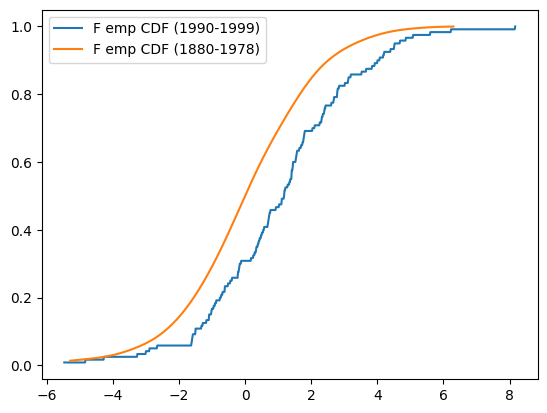

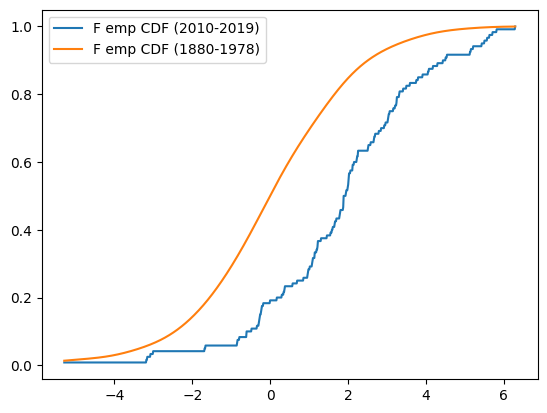

In [ ]:
# 1-2
# 	Tehke 2 joonist, kus ühel on kümnendi 1990-1999 ja teisel kümnendi 2010-2019 empiiriline jaotusfunktsioon.
#	Võrdluseks lisada mõlemale joonisele aastasaja 1880-1979 empiiriline jaotusfunktsioon.


plt.plot(x_vektor_1990_1999, F_emp_1990_1999, label='F emp CDF (1990-1999)')
plt.plot(
	x_vektor,
	emp_cdf_anomaalia_1880_1979_kde,
	label='F emp CDF (1880-1978)'
)
plt.legend()
plt.show()

plt.plot(x_vektor_2010_2019, F_emp_2010_2019, label='F emp CDF (2010-2019)')
plt.plot(
	x_vektor,
	emp_cdf_anomaalia_1880_1979_kde,
	label='F emp CDF (1880-1978)'
)
plt.legend()
plt.show()

In [228]:
# 3
# 	Viige läbi 2-valimiline Kolmogorov-Smirnovi test (scipy.stats.ks_2samp), võrdlemaks kümnendi 1990-1999 anomaaliate empiirilist jaotust aastasaja 1880-1979 empiirilise jaotusega. Seejärel tehke sama võrdlemaks kümnendit 2010-2019 aastasajaga 1880-1979.

In [ ]:
ks_test_2samp_1990_1999 = scipy.stats.ks_2samp(
	_1990_1999['anomaalia_1880_1979'],
	emp_cdf_anomaalia_1880_1979_kde
)

print(f"Minu leitud statistik: \t{max_diff_value_1990_1999:.4f}")
print(f"KS test statistik: \t{ks_test_2samp_1990_1999.statistic:.4f}")

Minu leitud statistik: 	0.2364
KS test statistik: 	0.5333


In [ ]:
ks_test_2samp_2010_2019 = scipy.stats.ks_2samp(
	_2010_2019['anomaalia_1880_1979'],
	emp_cdf_anomaalia_1880_1979_kde
)

print(f"Minu leitud statistik: \t{max_diff_value_2010_2019:.4f}")
print(f"KS test statistik: \t{ks_test_2samp_2010_2019.statistic:.4f}")

Minu leitud statistik: 	0.4283
KS test statistik: 	0.7167


In [231]:
max_diff_value_2010_2019-ks_test_2samp_2010_2019.statistic

np.float64(-0.2883879478229569)

In [ ]:
# 4
# 	Kas leitud p-väärtused erinevad oluliselt võrreldes eelmises alapunktis tehtud 1-valimilise Kolmogorov-Smirnovi testiga? Miks erinevad või ei erine?

# Erninevad väga palju aga mai tea miks :D
# Vist sõltumatusega seotud?

<font color='purple'>**(g) On alust arvata, et kahe järjestikuse kuu anomaaliad on korreleeritud. See tekitab olukorra, kus järjestikuseid anomaaliaid ei saa vaadelda täielikult sõltumatutena ning seetõttu ei kehti Kolmogorov-Smirnovi testi eeldus, mille järgi peavad valimi elemendid olema sõltumatud ja sama jaotusega ehk s.s.j. (ingl.k. _independent and identically distributed_ ehk _i.i.d._). Sõltuvuste uurimiseks saame arvutada autokorrelatsiooni nihkega x kuud. See tähendab, et arvutame korrelatsiooni andmestiku ja selle x kuud nihutatud versiooni vahel.**</font>

<font color='purple'>**JUHISED:**</font>

1. <font color='purple'>**Arvutage andmestikus `d100` autokorrelatsioonid nihkega 1 kuud, 2 kuud, ..., 36 kuud. Seda saab teha funktsiooniga `d100.anomaalia_1880_1979.autocorr(...)` (eeldab, et andmestikus on anomaaliad ajalises järjekorras).**</font>

2. <font color='purple'>**Teha joonis, kus x-teljel on nihe kuudes ja y-teljel vastav autokorrelatsioon..**</font>

3. <font color='purple'>**Oletame, et autokorrelatsioonid, mida näeme rohkem kui 12 kuu puhul on pigem juhuslikku laadi. Mitme kuu kaugusele ulatuvad sel juhul olulised korrelatsioonid? Otsustada enda parima äranägemise järgi jooniselt.**</font>

<font color='purple'>**OODATUD TULEMUS: Joonis ning selgitus selle kohta kui kaugele ulatuvad olulised autokorrelatsioonid.**</font>

**Küsimus praksi juhendajale:**

**_TEHTUD_** : 0/1


In [235]:
# 1
# 	Arvutage andmestikus d100 autokorrelatsioonid nihkega 1 kuud, 2 kuud, ..., 36 kuud. Seda saab teha funktsiooniga d100.anomaalia_1880_1979.autocorr(...) (eeldab, et andmestikus on anomaaliad ajalises järjekorras).

auto_corr_1_36 = [
	d['anomaalia_1880_1979'].autocorr(lag=i)
	for i in range(1, 37)
]

Text(0.5, 1.0, 'Autokorrelatsioonid nihkega 1-36 kuud')

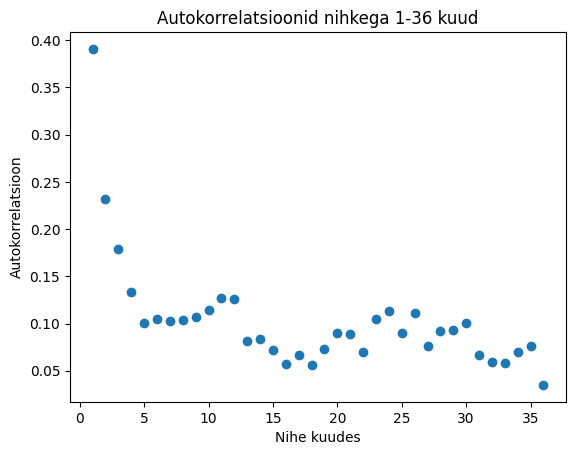

In [ ]:
plt.scatter(
	range(1, 37),
	auto_corr_1_36
)
plt.xlabel('Nihe kuudes')
plt.ylabel('Autokorrelatsioon')
plt.title('Autokorrelatsioonid nihkega 1-36 kuud')

In [ ]:
# 3
# 	Oletame, et autokorrelatsioonid, mida näeme rohkem kui 12 kuu puhul on pigem juhuslikku laadi. Mitme kuu kaugusele ulatuvad sel juhul olulised korrelatsioonid? Otsustada enda parima äranägemise järgi jooniselt.

# Ma arvan et ca kuni 2-3 kuud on olulised korrelatsioonid, ülejäänud on pigem juhuslikud. Ütles et aastaaegade järgi on mingi korrelatsioon.

<font color='purple'>**(h) Et Kolmogorov-Smirnovi testi rakendamiseks andmed enam-vähem sõltumatud oleks, saame kuu keskmiste anomaaliate asemel kasutada aasta keskmiseid.**</font>

<font color='purple'>**JUHISED:**</font>

1. <font color='purple'>**Arvutadege iga aasta kohta keskmine anomaalia: `d_aastakaupa = d.groupby('aasta').mean()`. Mis oli kõige hiljutisem aasta, kus aasta keskmine oli alla aastasaja 1880-1979 keskmise?**</font>

2. <font color='purple'>**Teha aastakaupa aastate 1880-1979 andmetel samasugune autokorrelatsiooni joonis nagu eelmises alapunktis, kuid nihkega 1 aasta, 2 aastat, ..., 30 aastat. On alust arvata, et need autokorrelatsioonid on kõik enam-vähem juhuslikku laadi.**</font>

3. <font color='purple'>**Viige läbi 2-valimiline Kolmogorov-Smirnovi test (`scipy.stats.ks_2samp`) võrdlemaks kümnendi 1990-1999 aastakaupa keskmiste anomaaliate empiirilist jaotust aastasaja 1880-1979 aastakaupa keskmiste anomaaliate empiirilise jaotusega. Seejärel tehke sama võrdlemaks kümnendit 2010-2019 aastasajaga 1880-1979.**</font>

4. <font color='purple'>**Kas leitud p-väärtused lükkavad ümber väite et kümnendi 1990-1999 (või 2010-2019) anomaaliad vastavad aastasaja 1880-1979 mudelile? Mida sellest järeldada kliimasoojenemise kohta?**</font>

<font color='purple'>**OODATUD TULEMUS: Kõige hiljutisem aasta, kus aasta keskmine oli alla aastasaja 1880-1979 keskmise; joonis autokorrelatsioonidega. Kolmogorov-Smirnovi testi tulemused ja nende tõlgendamine ning järeldused.**</font>

**Küsimus praksi juhendajale:**

**_TEHTUD_** : 0/1


In [ ]:
# 1
# 	Arvutadege iga aasta kohta keskmine anomaalia: d_aastakaupa = d.groupby('aasta').mean(). Mis oli kõige hiljutisem aasta, kus aasta keskmine oli alla aastasaja 1880-1979 keskmise?


d_aastakaupa = d.groupby('aasta').mean()

aastasaja_keskmine = np.mean(
	d_aastakaupa.loc[(d_aastakaupa.index >= 1880) & (d_aastakaupa.index <= 1979), 'anomaalia_1880_1979']
)

hiljutisem_allapoole = d_aastakaupa[d_aastakaupa['anomaalia_1880_1979'] < aastasaja_keskmine]

hiljutisem_aasta = hiljutisem_allapoole.index.max()
hiljutisem_aasta

np.int64(1996)

Text(0.5, 1.0, 'Autokorrelatsioonid nihkega 1-30 aastat')

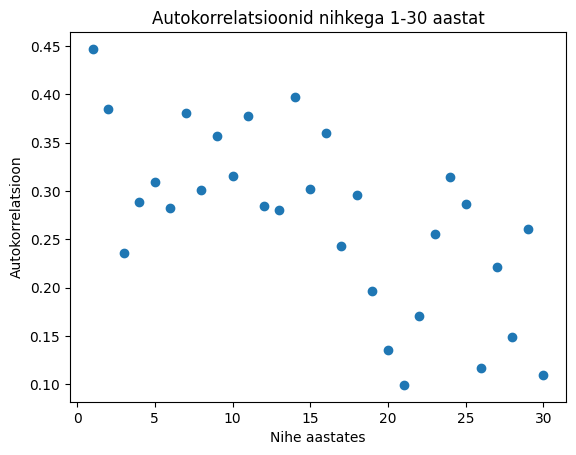

In [252]:
# 2
# 	Teha aastakaupa aastate 1880-1979 andmetel samasugune autokorrelatsiooni joonis nagu eelmises alapunktis, kuid nihkega 1 aasta, 2 aastat, ..., 30 aastat. On alust arvata, et need autokorrelatsioonid on kõik enam-vähem juhuslikku laadi.

auto_corr_1_30_aastat = [
	d_aastakaupa['anomaalia_1880_1979'].autocorr(lag=i)
	for i in range(1, 31)
]

plt.scatter(
	range(1, 31),
	auto_corr_1_30_aastat
)
plt.xlabel('Nihe aastates')
plt.ylabel('Autokorrelatsioon')
plt.title('Autokorrelatsioonid nihkega 1-30 aastat')

In [258]:
# 3
# 	Viige läbi 2-valimiline Kolmogorov-Smirnovi test (scipy.stats.ks_2samp) võrdlemaks kümnendi 1990-1999 aastakaupa keskmiste anomaaliate empiirilist jaotust aastasaja 1880-1979 aastakaupa keskmiste anomaaliate empiirilise jaotusega. Seejärel tehke sama võrdlemaks kümnendit 2010-2019 aastasajaga 1880-1979.

# 3
# 	Viige läbi 2-valimiline Kolmogorov-Smirnovi test (scipy.stats.ks_2samp) võrdlemaks kümnendi 1990-1999 aastakaupa keskmiste anomaaliate empiirilist jaotust aastasaja 1880-1979 aastakaupa keskmiste anomaaliate empiirilise jaotusega. Seejärel tehke sama võrdlemaks kümnendit 2010-2019 aastasajaga 1880-1979.

#_1990_1999_aastakaupa =  d_aastakaupa.loc[
#	(d_aastakaupa.index >= 1990) & (d_aastakaupa.index <= 1999),
#	'anomaalia_1880_1979'
#]

#_2010_2019_aastakaupa = d_aastakaupa.loc[
#	(d_aastakaupa.index >= 2010) & (d_aastakaupa.index <= 2019),
#	'anomaalia_1880_1979'
#]

_1990_1999_aastakaupa = aastafilter(d, 1990, 1999).groupby('aasta').mean()['anomaalia_1880_1979']
_2010_2019_aastakaupa = aastafilter(d, 2010, 2019).groupby('aasta').mean()['anomaalia_1880_1979']
_1880_1979_aastakaupa = aastafilter(d, 1880, 1979).groupby('aasta').mean()['anomaalia_1880_1979']


ks_test_2samp_1990_1999_aastakaupa = scipy.stats.ks_2samp(
	_1990_1999_aastakaupa,
	_1880_1979_aastakaupa
)

print(f"KS test statistik (1990-1999): \t{ks_test_2samp_1990_1999_aastakaupa.statistic:.4f}")

ks_test_2samp_2010_2019_aastakaupa = scipy.stats.ks_2samp(
	_2010_2019_aastakaupa,
	_1880_1979_aastakaupa
)

print(f"KS test statistik (2010-2019): \t{ks_test_2samp_2010_2019_aastakaupa.statistic:.4f}")

KS test statistik (1990-1999): 	0.5600
KS test statistik (2010-2019): 	0.8000


In [ ]:
# 4
# 	Kas leitud p-väärtused lükkavad ümber väite et kümnendi 1990-1999 (või 2010-2019) anomaaliad vastavad aastasaja 1880-1979 mudelile? Mida sellest järeldada kliimasoojenemise kohta?

# Otseselt ei lükka kuna korrelatisoon on tugev aga siiski on näha, et soojenemine on toimunud.

## <font color='red'>Enne kodutöö esitamist palun lähtesta kernel uuesti ning jooksuta kogu kood algusest peale korra läbi - selleks on vaja menüüst valida `Kernel` -> `Restart and Run All`.</font>

## Kodutöö tagasiside

Palun vasta nii täpselt kui oskad. See ei muuda mingilgi moel punkte, mille kodutöö eest saad. Nii 0,5 tundi kui 24 tundi on sobivad vastused. Kogutud informatsiooni kasutatakse kodutööde paremaks muutmiseks.

<font color = "red">**Tagasidet saad anda anonüümselt siin [Google Formsis](https://forms.gle/iAph8E2NivD7WUQN7).**</font>

**<font color='red'>SUUR TÄNU TEHTUD TÖÖ EEST!</font>**
